In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

df = pd.read_csv("/home/csl-4/Documents/7348/ASSIGNMENT6/spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
X = df['text']        # Email text
y = df['label_num']  # 0 = ham, 1 = spam

In [12]:
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.3, random_state=42
)

In [14]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
y_pred = model.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1101   20]
 [  16  415]]


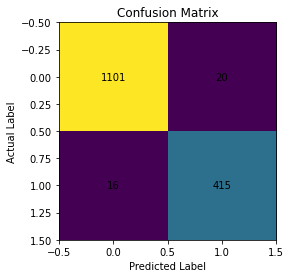

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Show values inside boxes
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

In [19]:
TN, FP, FN, TP = cm.ravel()

print("TP:", TP)
print("FP:", FP)
print("TN:", TN)
print("FN:", FN)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

TP: 415
FP: 20
TN: 1101
FN: 16
Accuracy: 0.9768041237113402
Error Rate: 0.023195876288659822
Precision: 0.9540229885057471
Recall: 0.962877030162413
